**算法应用如何开发——以逻辑回归算法为例**

In [ ]:
# 导入所需要的工具包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

: 

In [52]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


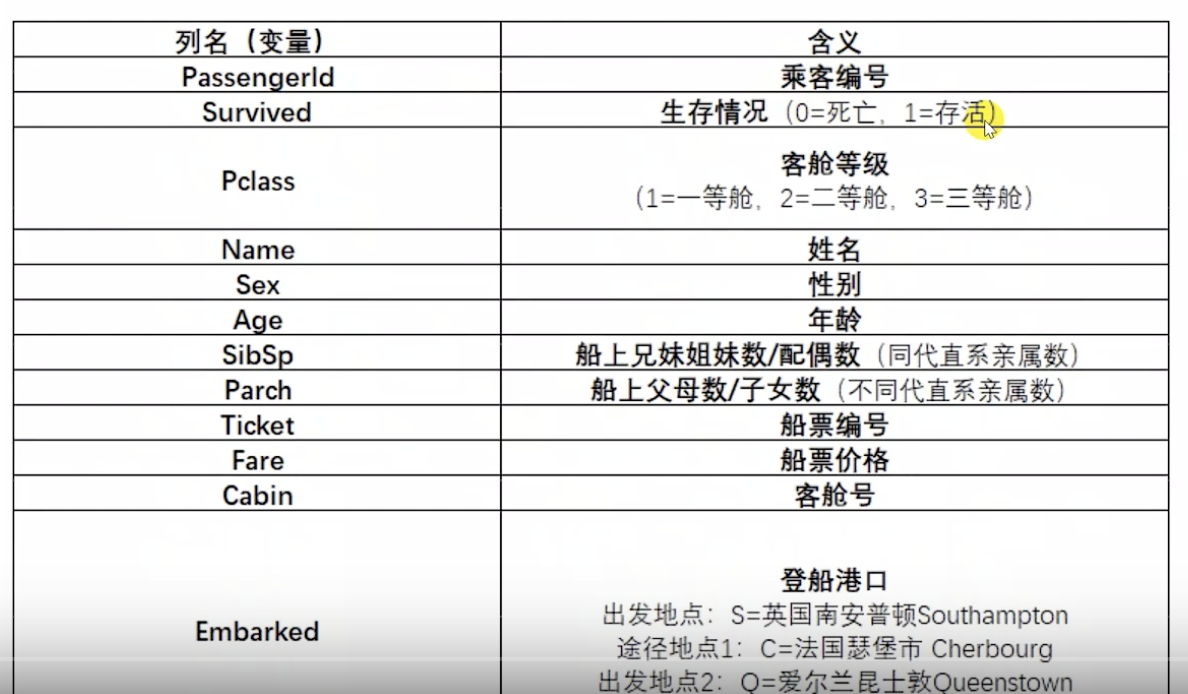

In [10]:
print('训练集数据总量: {}'.format(train_df.shape[0]))

训练集数据总量: 891


In [53]:
# 预览一下测试数据集
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
print('测试集数据总量: {}'.format(test_df.shape[0]))

测试集数据总量: 418


In [54]:
train_df.isnull().sum() # 查看列的分布，是否有缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# 整体看看数据啥规模
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Age - 缺失值分析**

In [19]:
print("缺失age列的行占比为：%.2f%%" % ((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

缺失age列的行占比为：19.87%


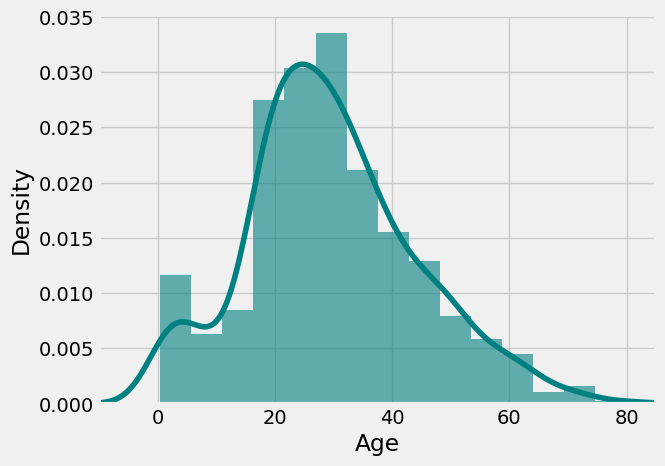

In [25]:
# 直方图展示
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
# 线形图
train_df['Age'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [27]:
print('Age平均值： %.2f' % (train_df['Age'].mean(skipna=True)))

Age平均值： 29.70


In [28]:
print('Age中位数：%.2f' % (train_df['Age'].median(skipna=True)))

Age中位数：28.00


用以上两个值可以用来补齐缺失的20%的age，因为age从直觉上来说确实对结果有影响，很重要

**客舱号——缺失值分析**

In [30]:
print('缺失客舱号占比：%.2f%%'%((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

缺失客舱号占比：77.10%


这个缺失占比太大，而且对结果从直觉上影响没那么大，所以基本不可使用了，采用剔除的方式整理

**登船港口——缺失值分析**

In [31]:
print('缺失登船港口占比：%.2f%%'%((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

缺失登船港口占比：0.22%


In [33]:
# 柱状图
print('登船港口分类:')
print(train_df['Embarked'].value_counts())

登船港口分类:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


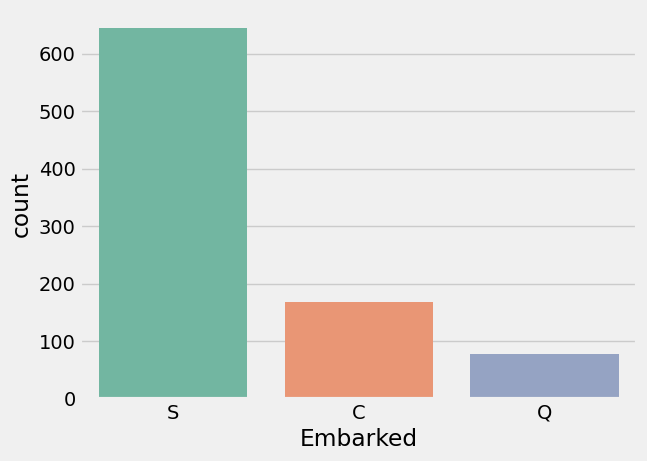

In [34]:
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

**预处理数据——补齐缺失值，剔除无效值**

In [66]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

print('数据预处理完毕！')

数据预处理完毕！


**特征工程**

In [67]:
# 特征交互——融合创造新的特征
# 创建一个新的特征——是否是独自旅行，
train_data['TravelAlone'] = np.where((train_data["SibSp"]+train_data['Parch'])>0,  0,1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

training = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex'])

training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)
training = training.astype(int)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22,7,0,0,0,1,0,0,1,1
1,1,38,71,0,1,0,0,1,0,0,0
2,1,26,7,1,0,0,1,0,0,1,0
3,1,35,53,0,1,0,0,0,0,1,0
4,0,35,8,1,0,0,1,0,0,1,1


**训练集所有的预处理手段都要对测试集重新做一遍**

In [69]:
# 对训练数据如何处理，就要对测试数据如何处理
test_data = test_df.copy()
test_data['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)
test_data['Fare'].fillna(train_df['Fare'].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['TravelAlone'] = np.where((test_data["SibSp"]+test_data['Parch'])>0,  0,1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex'])

testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)
testing = testing.astype(int)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34,7,1,0,0,1,0,1,0,1
1,47,7,0,0,0,1,0,0,1,0
2,62,9,1,0,1,0,0,1,0,1
3,27,8,1,0,0,1,0,0,1,1
4,22,12,0,0,0,1,0,0,1,0


**更具体的数据分析——特征分析**

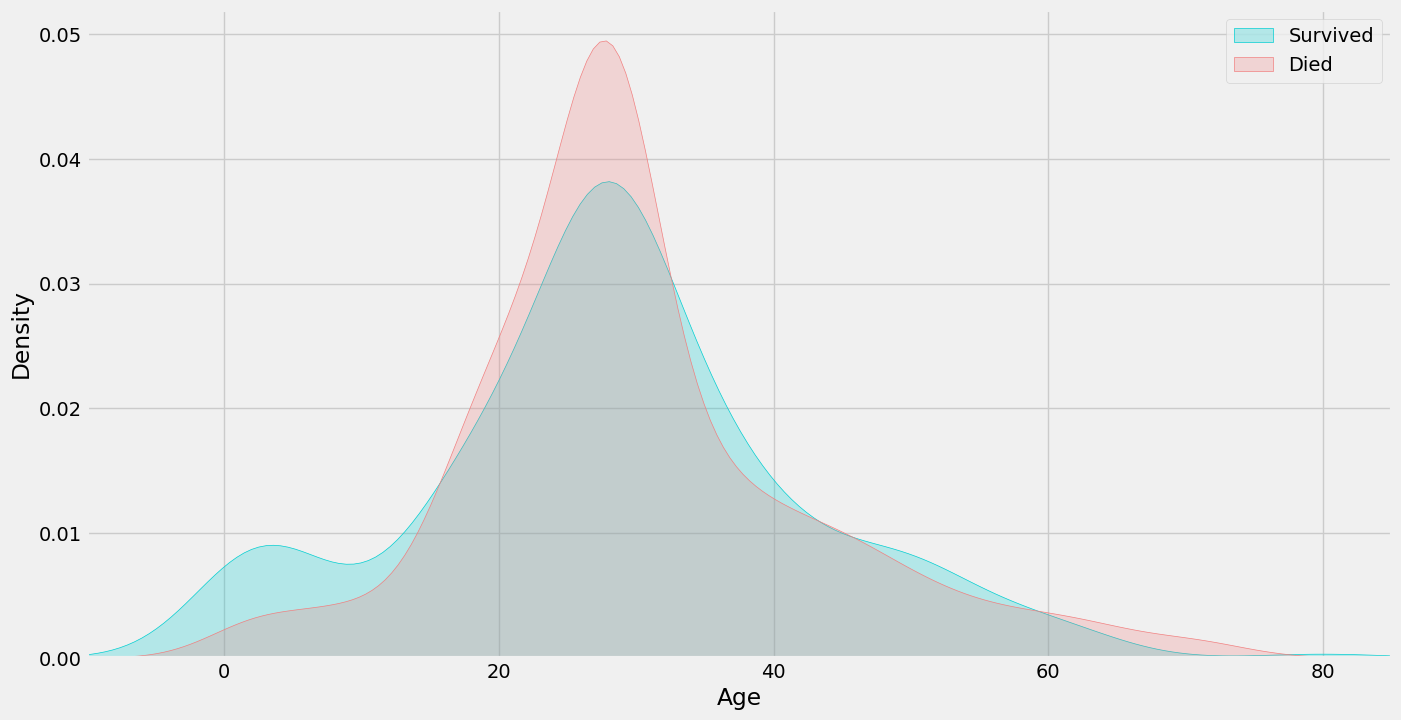

In [72]:
# 年龄分析
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train['Age'][final_train.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [73]:
# 分析： 幸存者和死者的年龄分布比较相似，但是幸存者中，儿童的比例更大

In [74]:
final_train['IsMinor'] = np.where(final_train['Age'] <= 16, 1,0)
final_test['IsMinor'] = np.where(final_test['Age']<=16, 1,0)

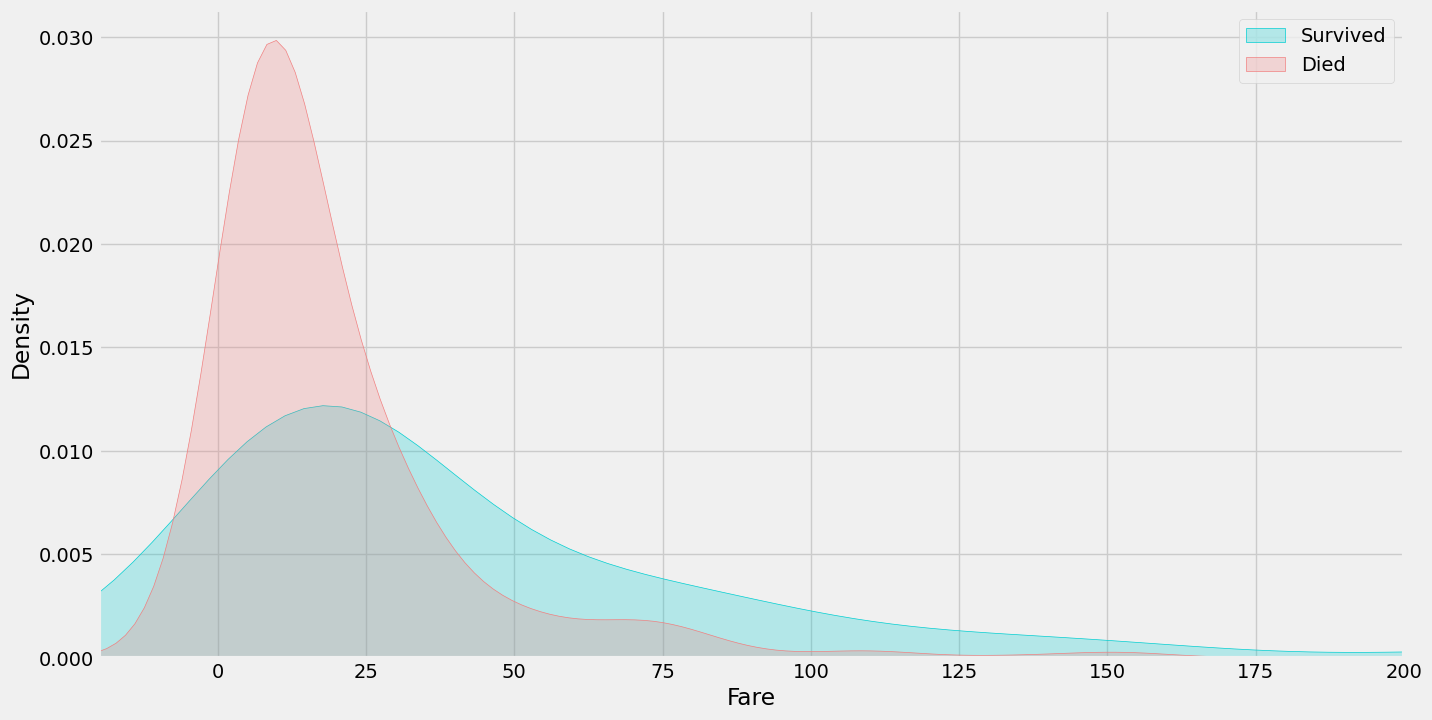

In [75]:
# 船票票价分析
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
ax.set(xlabel='Fare')
plt.xlim(-20, 200)
plt.show()

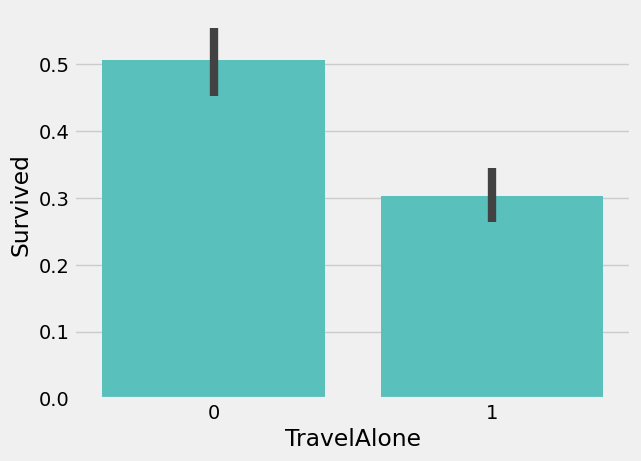

In [88]:
# 分析单身对结果的影响
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color='mediumturquoise')
plt.show()

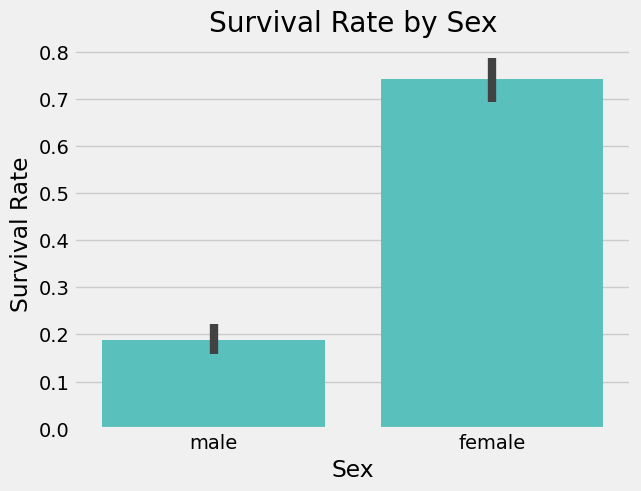

In [87]:
# 分析性别对生还的影响
sns.barplot(x='Sex', y='Survived', data=train_df, color='mediumturquoise')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

In [91]:
# 逻辑回归算法实现
# 特征选取
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
x = final_train[cols]
y = final_train['Survived']
# 创建逻辑回归模型
model = LogisticRegression()

# 使用RFE进行特征选择，选择8个最重要的特征
rfe = RFE(estimator=model, n_features_to_select=9)
rfe = rfe.fit(x, y)
print('被选择的特征：%s' % list(x.columns[rfe.support_]))

被选择的特征：['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


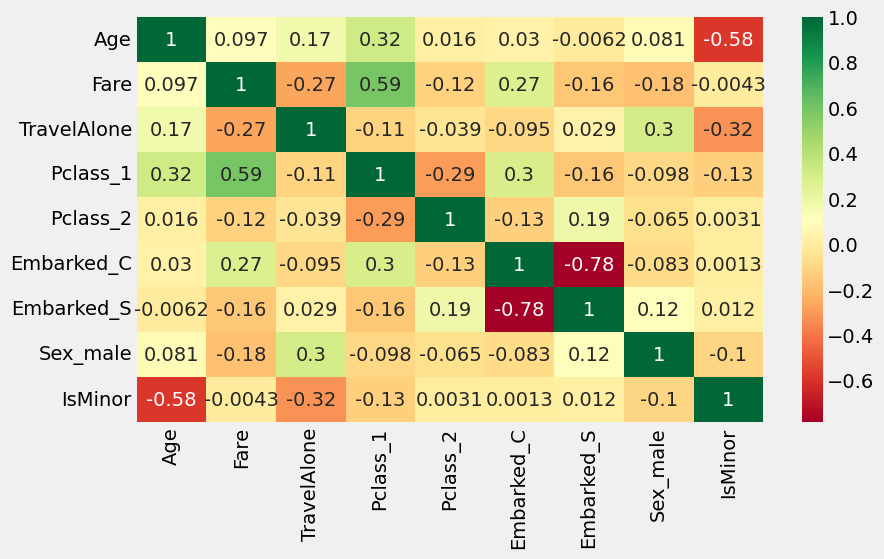

In [92]:
selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
x = final_train[selected_features]
plt.subplots(figsize=(9, 5))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')
plt.show()

Train/Test split result:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.839


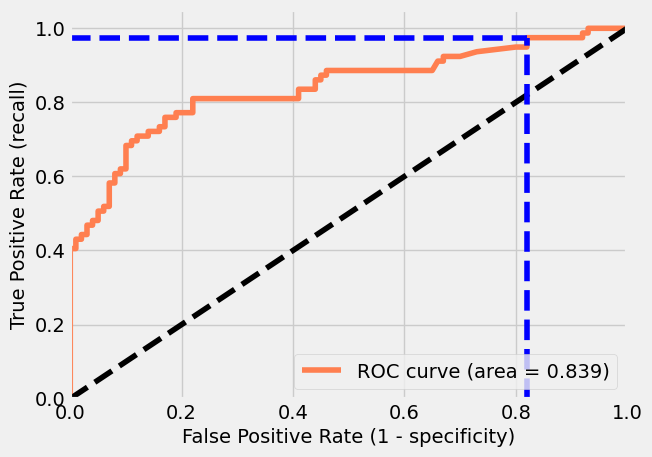

In [96]:
# 正式开始训练
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

x = final_train[selected_features]
y = final_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# 模型性能评估
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split result:')
print(logreg.__class__.__name__ + ' accuracy is %2.3f' % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + ' log_loss is %2.3f' % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + ' auc is %2.3f' % auc(fpr, tpr))

idx = np.min(np.where(tpr>0.95))
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.legend(loc='lower right')
plt.show()



In [97]:
import joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']